In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os

%matplotlib inline

In [3]:
monthly_01_20raw = pd.read_csv("../CSV/datos_mes_01_20.csv")

monthly_01_20raw['FECHA'] = pd.to_datetime(monthly_01_20raw['FECHA'], format = '%Y-%m-%d')

monthly_01_20raw = monthly_01_20raw.set_index(['FECHA'])

In [4]:
monthly_df = monthly_01_20raw.groupby(['FECHA']).agg('mean')
monthly_df2 = monthly_df.resample('M').mean()

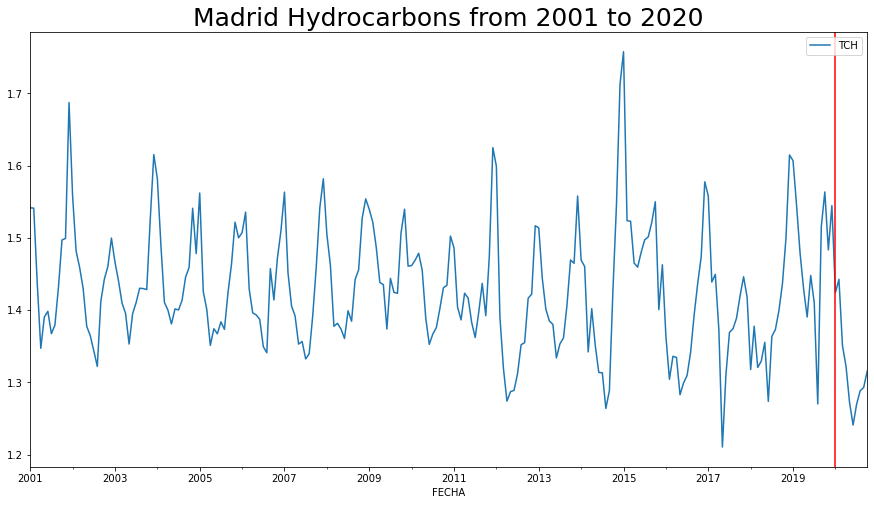

In [20]:
col_list = ['TCH']
plt_monthly = monthly_df2[col_list]
plt_monthly.plot(figsize=(15, 8))
plt.title('Madrid Hydrocarbons from 2001 to 2020', fontsize=25)
plt.legend(loc='upper right')
plt.axvline('2020', c='red')
plt.savefig('hydrocarbons_levels_from_01_20.png')

plt.show()

--------Additive-------


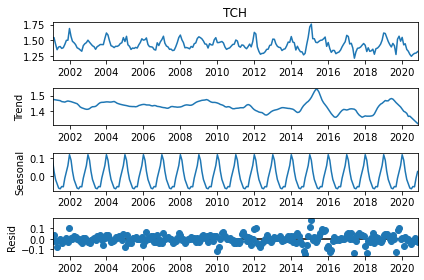

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
result_mul = seasonal_decompose(plt_monthly['TCH'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition

result_add = seasonal_decompose(plt_monthly['TCH'], model = 'additive', extrapolate_trend = 'freq')

# Plot
"""plt.rcParams.update({'figure.figsize': (6,6)})
print("--------Multiplicative-------")
result_mul.plot()"""
print("--------Additive-------")
result_add.plot()
plt.savefig('hidro_decompose_01_20.png');
#plt.show()

In [7]:
X = plt_monthly['TCH'].values
train = X[:228]
test = X[228:]
test

array([1.4244086 , 1.4427381 , 1.35064516, 1.32255556, 1.27247312,
       1.24111111, 1.26978495, 1.2883871 , 1.293     , 1.31569892])

In [8]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True,
                  random_state=42,
                  sesionality = True)

print(model.aic())

predictions = model.predict(10)
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-477.238, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-609.033, Time=1.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=813.187, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-601.610, Time=0.47 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-636.003, Time=2.42 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-634.943, Time=4.26 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-533.138, Time=0.89 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-668.810, Time=2.55 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-652.498, Time=1.62 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-674.456, Time=4.57 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=5.14 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : A

In [9]:
plt_monthly['TCH'].describe()

count    238.000000
mean       1.426256
std        0.086425
min        1.210629
25%        1.370216
50%        1.418928
75%        1.477367
max        1.757744
Name: TCH, dtype: float64

''

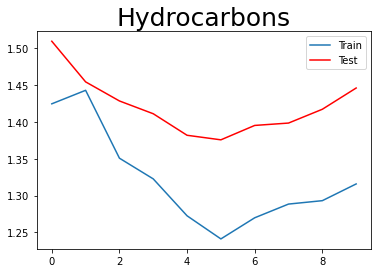

In [10]:
plt.plot(test)
plt.plot(predictions,color='red')
plt.legend(['Train', 'Test'])
plt.title('Hydrocarbons', fontsize=25)
plt.savefig('hidro_predict_01_20.png')
;

In [24]:
exogenous = monthly_df2[['NO_2']][:228].values.reshape(-1,1)

In [25]:

model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True,
                   random_state=42,
                   sesionality = True,
                   exogenous= exogenous)
print(model.summary())

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-714.789, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-715.098, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-714.998, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-716.778, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-715.409, Time=0.44 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-714.840, Time=0.73 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-714.044, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-714.452, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-715.040, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-712.705, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 8.578 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:           

In [39]:
predictions_exo = model.predict(10,
                           exogenous= monthly_df2[['NO_2']][228:].values.reshape(-1,1))
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

mean_squared_error: 0.011129119019346717
root_mean_squared_error: 0.105494639765946


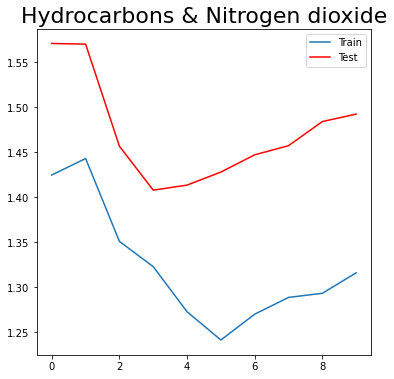

In [53]:
plt.plot(test)
plt.plot(predictions_exo,color='red')
plt.legend(['Train', 'Test'])
plt.title('Hydrocarbons & Nitrogen dioxide', fontsize=22)
plt.savefig('hidro_exopredict_01_20.png');

ValueError: Exogenous array dims (n_rows) != n_periods